## Cleaning, merging and displaying csv and xlsx files

### My Very First Jupyter Notebook! This is just an exercise and proof of concept....

The task is to take in a list of current sales inforamtion, clean it up and use it to train a machine learning model that will predict the top five most successful products from the list. I needed to take the raw spreadsheets, clean them up and create a new clean spreadsheet that I would import to RapidMiner and train various machine learning models on to gain the best performance. Once the best performance is achieved - I would predict the top 5 items (based upon predicted volume of sales and then multiplied by the profit margin and price). 

In this notebook, I do not create new csv files. In this case, I already have the output from the machine learning exercise because I've already completed the exercise. So, I'm able to show that Jupyter Notebook can clean my files and store them as a dataframe, then let me merge with the final machine learning output file and perform calculations. 

Lastly, instead of writing a final csv file with the top 5 ranking, I simply create a bar graph of the top 5 items.

In [1]:
# Clean up csv files and save them as dataframes that can be accessed later in the post-machine learning phase

#Load necessary packages
library(tidyverse)

# Read in csv files, fix header values and replace missing values with NA
existing <- read.csv("existingProductAttributes.csv", header = TRUE, na.strings = c("", "NA"))
newProds <- read.csv("newProductAttributes.csv", header = TRUE, na.strings = c("", "NA"))

#Changes name of second column b/c r handles # differently, then assign column names to second file so that they match
colnames(existing)[2] <- "Product.Number" 
colnames(newProds) <- colnames(existing)

Warning message:
"package 'tidyverse' was built under R version 3.5.2"-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.0     v purrr   0.2.5
v tibble  2.0.1     v dplyr   0.7.8
v tidyr   0.8.2     v stringr 1.3.1
v readr   1.3.1     v forcats 0.3.0
Warning message:
"package 'ggplot2' was built under R version 3.5.2"Warning message:
"package 'tibble' was built under R version 3.5.2"Warning message:
"package 'tidyr' was built under R version 3.5.2"Warning message:
"package 'readr' was built under R version 3.5.2"Warning message:
"package 'purrr' was built under R version 3.5.2"Warning message:
"package 'dplyr' was built under R version 3.5.2"Warning message:
"package 'stringr' was built under R version 3.5.2"Warning message:
"package 'forcats' was built under R version 3.5.2"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


### More proof of concept. Instead of writing new files, I just wanted to see if the above code worked by comparing the first few rows.

In [5]:
#Show the head of both new dataframes. These dataframes were originally written back to csv files 
#and then used in RapidMinder for correlation matrices, feature selection, filtering and model testing
head(existing)
head(newProds)

Product.Type,Product.Number,Price,X5.Star.Reviews,X4.Star.Reviews,X3.Star.Reviews,X2.Star.Reviews,X1.Star.Reviews,Positive.Service.Review,Negative.Service.Review,Would.consumer.recommend.product,Best.Sellers.Rank,Shipping.Weight..lbs.,Product.Depth,Product.Width,Product.Height,Profit.margin,Volume
PC,101,949.00,3,3,2,0,0,2,0,0.9,1967,25.8,23.94,6.62,16.89,0.15,12
PC,102,2249.99,2,1,0,0,0,1,0,0.9,4806,50.0,35.00,31.75,19.00,0.25,8
PC,103,399.00,3,0,0,0,0,1,0,0.9,12076,17.4,10.50,8.30,10.20,0.08,12
Laptop,104,409.99,49,19,8,3,9,7,8,0.8,109,5.7,15.00,9.90,1.30,0.08,196
Laptop,105,1079.99,58,31,11,7,36,7,20,0.7,268,7.0,12.90,0.30,8.90,0.09,232
Accessories,106,114.22,83,30,10,9,40,12,5,0.3,64,1.6,5.80,4.00,1.00,0.05,332


Product.Type,Product.Number,Price,X5.Star.Reviews,X4.Star.Reviews,X3.Star.Reviews,X2.Star.Reviews,X1.Star.Reviews,Positive.Service.Review,Negative.Service.Review,Would.consumer.recommend.product,Best.Sellers.Rank,Shipping.Weight..lbs.,Product.Depth,Product.Width,Product.Height,Profit.margin,Volume
PC,171,699.00,96,26,14,14,25,12,3,0.7,2498,19.9,20.63,19.25,8.39,0.25,0
PC,172,860.00,51,11,10,10,21,7,5,0.6,490,27.0,21.89,27.01,9.13,0.20,0
Laptop,173,1199.00,74,10,3,3,11,11,5,0.8,111,6.6,8.94,12.80,0.68,0.10,0
Laptop,175,1199.00,7,2,1,1,1,2,1,0.6,4446,13.0,16.30,10.80,1.40,0.15,0
Laptop,176,1999.00,1,1,1,3,0,0,1,0.3,2820,11.6,16.81,10.90,0.88,0.23,0
Netbook,178,399.99,19,8,4,1,10,2,4,0.6,4140,5.8,8.43,11.42,1.20,0.08,0


### Taking the machine learning output file and performing calculations on it. 

Once all of the modeling is completed in RapidMinder, the final output is a csv file. The following steps take the csv file and merge it with the provided 'profitability' file to add in the predicted volume column and then perform math to calculate the anticipated profit per prouct, sort and write back to a csv file. In this notebook, we will display the graph instead of writing back the csv file.

In [19]:
## read in model data and profitiabilty data then select the columns of importance
model_df <- read.csv("model_data.csv", header = TRUE, sep = ";")
model_volume <- model_df %>%
  select(tail(names(.), 2))

profit_df <- readxl::read_xlsx("profitability.xlsx", sheet = 1, col_names = TRUE, skip = 1, 
                               .name_repair = "universal")
profit_margin <- profit_df %>%
  select(1, 2, 3, 4, 19)
colnames(profit_margin)[2] <- "Product.Number"

#join two df together and mutate for the profit margin column and sort by predicted profit margin
profit_final <- merge(model_volume, profit_margin, by = "Product.Number")
profit_final <- profit_final %>%
  mutate(pred_profit = prediction.Volume.* Price * Profit.margin)
profit_final <- profit_final[order(profit_final$pred_profit, decreasing = TRUE),]
profit_final <- profit_final[, c(1, 3, 4, 5, 6, 2, 7)]
colnames(profit_final) <- c("Product.Number", "Type", "Brand", "Price", "Profit.Margin", "Predicted.Volume", "Predicted.Profit")


New names:
* `Product Type` -> Product.Type
* `Product #` -> Product..
* `Brand Name` -> Brand.Name
* `5 Star Reviews` -> ..5.Star.Reviews
* `4 Star Reviews` -> ..4.Star.Reviews
* ... and 13 more


### Now, we can insert a graph that will show the top 5 items sorted by predicted gross profit!

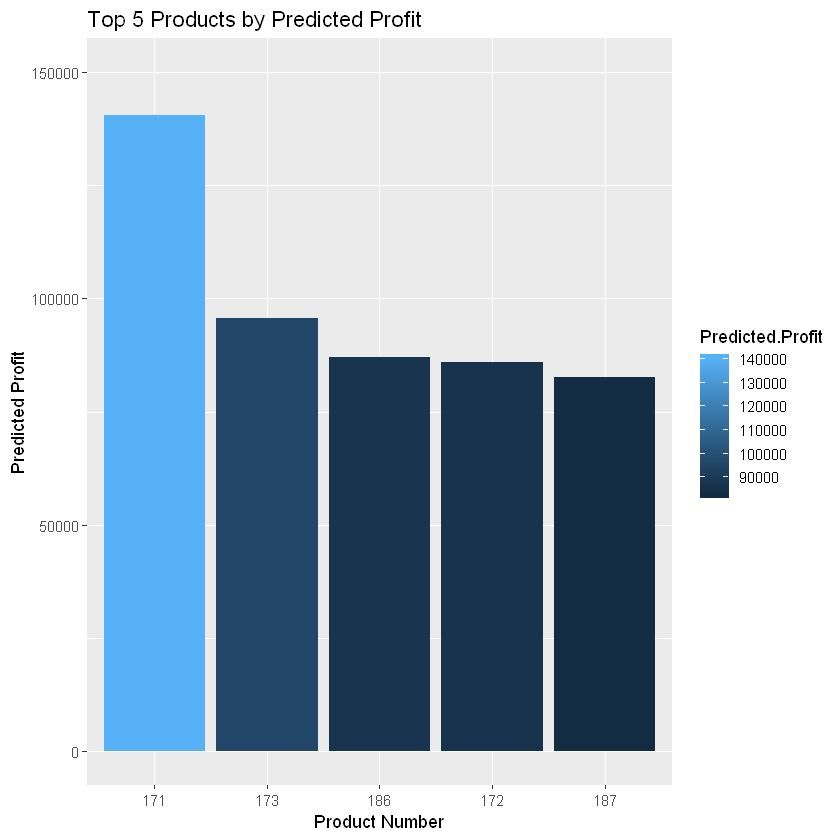

In [48]:
#create a graph for top 5 products based upon total profit -- predicted volume x profit margin x price

profit_final$Product.Number <- as.character(profit_final$Product.Number) #need to change to chr for proper display on chart

profit_final %>%
    filter(Predicted.Profit > 70000) %>%
    mutate(Product.Number = fct_reorder(Product.Number, Predicted.Profit, .desc = TRUE)) %>% #display in order of profit
    ggplot +
  geom_col(aes(x = Product.Number, y = Predicted.Profit, fill = Predicted.Profit)) +
  labs(x = "Product Number", y = "Predicted Profit", title = "Top 5 Products by Predicted Profit") +
  coord_cartesian(ylim = c(0, 150000))

## Proof of Concept Complete!
Thanks for checking out my first Jupyter notebook. I have a full blog post describing how I installed, setup, ran and uploaded Jupyter here: <a href ="https://jeremy-harris.github.io/Installing-And-Using-Jupyter-Notebook-With-R-For-The-First-Time/"> Blog on Installing and Using Jupyter For The First Time!</a>